**Data Inspection Summary**

COVID-19 Dataset

*   Rows: 166,326
*   Columns: 67

This dataset contains detailed information about COVID-19 cases, deaths, hospitalizations, and other metrics broken down by country and date. Not all columns are fully populated; there are several missing values, especially in detailed metrics like ICU and hospital admissions.


In [3]:
import pandas as pd

# Load the dataset
file_path = 'owid-covid-data.csv'
data = pd.read_csv(file_path)

# Initial inspection: Display the first few rows and the overall information of the dataset
print("Initial Data:")
print(data.head())
print(data.info())

Initial Data:
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   female_smokers  male_smokers  handwashing_facilities  \
0             NaN        



> Checking missing values in column by percentage




In [4]:
# Calculate the percentage of missing data for each column

missing_percentage = data.isnull().mean() * 100
print("Percentage of Missing Data by Column:")
print(missing_percentage)

with pd.option_context('display.max_rows', None):
    print(missing_percentage)

Percentage of Missing Data by Column:
iso_code                                    0.000000
continent                                   5.985835
location                                    0.000000
date                                        0.000000
total_cases                                 1.823527
                                             ...    
human_development_index                    18.080757
excess_mortality_cumulative_absolute       96.575400
excess_mortality_cumulative                96.575400
excess_mortality                           96.575400
excess_mortality_cumulative_per_million    96.575400
Length: 67, dtype: float64
iso_code                                       0.000000
continent                                      5.985835
location                                       0.000000
date                                           0.000000
total_cases                                    1.823527
new_cases                                      1.919724
new_cases_smooth



> As there are lot of missing values in the dataset we will drop the columns with more than 30% of missing as filling them might skew our analysis further.



In [5]:
# Identify columns where more than 30% of the data is missing
columns_to_drop = missing_percentage[missing_percentage > 30].index.tolist()
print("Columns to be dropped due to high missing values (>30%):")
print(columns_to_drop)

# Drop these columns from the dataset
data_cleaned = data.drop(columns=columns_to_drop)
print("Data after dropping high-missing columns:")
print(data_cleaned.info())

# Selecting only the essential columns for analysis
essential_columns = [
    'iso_code', 'continent', 'location', 'date',
    'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
    'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
    'total_cases_per_million', 'total_deaths_per_million'
]
data_final = data_cleaned[essential_columns]
print("Selected essential columns:")
print(data_final.head())

Columns to be dropped due to high missing values (>30%):
['icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred', 'extreme_poverty', 'female_smokers', 'male_smokers', 'handwashing_facilities', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumula

In [6]:
#check for null values further
print(data_final.isnull().mean() * 100)

iso_code                     0.000000
continent                    5.985835
location                     0.000000
date                         0.000000
population                   0.646321
population_density          11.061410
median_age                  17.132018
aged_65_older               18.030254
aged_70_older               17.576326
total_cases                  1.823527
new_cases                    1.919724
total_deaths                12.550654
new_deaths                  12.529009
total_cases_per_million      2.279259
total_deaths_per_million    12.998569
dtype: float64


In [7]:
# Drop the 'continent' column from the DataFrame as it is not required
data_final = data_final.drop('continent', axis=1)

# Verify if the column is dropped
print(data_final.head())


  iso_code     location        date  population  population_density  \
0      AFG  Afghanistan  2020-02-24  39835428.0              54.422   
1      AFG  Afghanistan  2020-02-25  39835428.0              54.422   
2      AFG  Afghanistan  2020-02-26  39835428.0              54.422   
3      AFG  Afghanistan  2020-02-27  39835428.0              54.422   
4      AFG  Afghanistan  2020-02-28  39835428.0              54.422   

   median_age  aged_65_older  aged_70_older  total_cases  new_cases  \
0        18.6          2.581          1.337          5.0        5.0   
1        18.6          2.581          1.337          5.0        0.0   
2        18.6          2.581          1.337          5.0        0.0   
3        18.6          2.581          1.337          5.0        0.0   
4        18.6          2.581          1.337          5.0        0.0   

   total_deaths  new_deaths  total_cases_per_million  total_deaths_per_million  
0           NaN         NaN                    0.126             

**we will drop population and population density null value rows, fill the other columns with linear regression and other methods**

In [8]:
data_final = data_final.dropna(subset=['population', 'population_density'])

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Function to convert 'date' column to ordinal
def date_to_ordinal(df):
    df['date_ordinal'] = df['date'].apply(lambda x: x.toordinal())
    return df

# Function to impute missing values using linear regression for a given column
def impute_with_linear_regression(df, column_name):
    # Drop rows where the target column is NaN to fit the model
    train_df = df.dropna(subset=[column_name])

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(train_df[['date_ordinal']], train_df[column_name])

    # Predict and fill missing values
    predict_df = df[df[column_name].isnull()]
    df.loc[df[column_name].isnull(), column_name] = model.predict(predict_df[['date_ordinal']])

    return df

# Assuming 'data_final' is your DataFrame and 'date' is in datetime format
data_final['date'] = pd.to_datetime(data_final['date'])

# Convert 'date' to ordinal
data_final = date_to_ordinal(data_final)

# Columns to impute
columns_to_impute = ['median_age', 'aged_65_older', 'aged_70_older', 'total_cases','total_deaths','total_cases_per_million','total_deaths_per_million']

# Impute each column
for column in columns_to_impute:
    data_final = impute_with_linear_regression(data_final, column)

# Remove the 'date_ordinal' column if it's no longer needed
data_final = data_final.drop('date_ordinal', axis=1)

# Replace NaN values in the 'new_cases' and 'new_deaths column with zero
data_final['new_cases'].fillna(0, inplace=True)
data_final['new_deaths'].fillna(0, inplace=True)

# Now 'data_final' will have the missing values imputed for the specified columns
print(data_final.head())

  iso_code     location       date  population  population_density  \
0      AFG  Afghanistan 2020-02-24  39835428.0              54.422   
1      AFG  Afghanistan 2020-02-25  39835428.0              54.422   
2      AFG  Afghanistan 2020-02-26  39835428.0              54.422   
3      AFG  Afghanistan 2020-02-27  39835428.0              54.422   
4      AFG  Afghanistan 2020-02-28  39835428.0              54.422   

   median_age  aged_65_older  aged_70_older  total_cases  new_cases  \
0        18.6          2.581          1.337          5.0        5.0   
1        18.6          2.581          1.337          5.0        0.0   
2        18.6          2.581          1.337          5.0        0.0   
3        18.6          2.581          1.337          5.0        0.0   
4        18.6          2.581          1.337          5.0        0.0   

   total_deaths  new_deaths  total_cases_per_million  total_deaths_per_million  
0  -5785.394047         0.0                    0.126               -162

**Correcting the Data types accordingly**

In [10]:
# Convert 'date' from object to datetime datatype
data_final['date'] = pd.to_datetime(data_final['date'])

# Convert specific columns to integer and replace negative values with zero where applicable
columns_to_integer = ['population', 'total_cases', 'new_cases', 'new_deaths', 'total_deaths']
for col in columns_to_integer:
    data_final[col] = data_final[col].apply(lambda x: int(max(x, 0)))

# Replace negative values with zero in 'total_deaths_per_million'
data_final['total_deaths_per_million'] = data_final['total_deaths_per_million'].apply(lambda x: max(x, 0))

# Verify the changes
data_final[['date','population', 'total_cases', 'new_cases', 'new_deaths', 'total_deaths', 'total_deaths_per_million']].head(), data_final.dtypes


(        date  population  total_cases  new_cases  new_deaths  total_deaths  \
 0 2020-02-24    39835428            5          5           0             0   
 1 2020-02-25    39835428            5          0           0             0   
 2 2020-02-26    39835428            5          0           0             0   
 3 2020-02-27    39835428            5          0           0             0   
 4 2020-02-28    39835428            5          0           0             0   
 
    total_deaths_per_million  
 0                       0.0  
 1                       0.0  
 2                       0.0  
 3                       0.0  
 4                       0.0  ,
 iso_code                            object
 location                            object
 date                        datetime64[ns]
 population                           int64
 population_density                 float64
 median_age                         float64
 aged_65_older                      float64
 aged_70_older               

In [11]:
print(data_final.isnull().mean() * 100)

iso_code                    0.0
location                    0.0
date                        0.0
population                  0.0
population_density          0.0
median_age                  0.0
aged_65_older               0.0
aged_70_older               0.0
total_cases                 0.0
new_cases                   0.0
total_deaths                0.0
new_deaths                  0.0
total_cases_per_million     0.0
total_deaths_per_million    0.0
dtype: float64


In [12]:
# Everything is looking good, now Save the cleaned data to a new CSV file
output_file_path = 'cleaned_covid_data.csv'
data_final.to_csv(output_file_path, index=False)
print("Data cleaning complete. Cleaned data saved to:", output_file_path)

Data cleaning complete. Cleaned data saved to: cleaned_covid_data.csv


**EDA on the dataset**

> we will perform exploratory data analysis on this cleaned dataset



*Cleaned data summary*
*    Total Rows: 147,928 entries
*Columns: The dataset contains 14 columns: iso_code, location, and date are categorical and temporal identifiers respectively.
* Population-based statistics like population, population_density, median_age, aged_65_older, and aged_70_older.
*COVID-19 related data including total_cases, new_cases, total_deaths, new_deaths, total_cases_per_million, and total_deaths_per_million.*

In [13]:
import pandas as pd

# Load the dataset
file_path = '/content/cleaned_covid_data.csv'
data = pd.read_csv(file_path)

# Display the basic info of data range
data.describe()

,population,population_density,median_age,aged_65_older,aged_70_older,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,total_deaths_per_million
count,1.479280e+05,147928.000000,147928.000000,147928.000000,147928.000000,1.479280e+05,1.479280e+05,1.479280e+05,147928.000000,147928.000000,147928.000000
mean,8.091777e+07,464.327406,30.603110,8.788368,5.550724,1.352564e+06,6.001870e+03,2.892688e+04,80.679628,30379.141005,491.598571
std,5.846180e+08,2144.135109,8.688925,5.889491,4.012404,1.285938e+07,6.525902e+04,2.406435e+05,642.588580,52978.190255,764.564187
min,1.087300e+04,0.137000,15.100000,1.144000,0.526000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-24623.917685,0.000000
25%,1.343875e+06,36.253000,23.100000,3.607000,2.162000,2.519000e+03,1.000000e+00,7.400000e+01,0.000000,604.227000,15.354000
50%,7.552800e+06,85.129000,30.529401,7.150000,4.593000,2.789150e+04,7.500000e+01,7.980000e+02,1.000000,4961.678500,125.923000
75%,2.967492e+07,212.865000,38.300000,13.260000,8.160000,2.707342e+05,8.620000e+02,7.763000e+03,11.000000,40870.348250,689.483000
max,7.874966e+09,20546.766000,48.200000,27.049000,18.493000,4.451295e+08,4.206334e+06,5.995245e+06,18020.000000,706541.904000,6322.263000


**Distribution plots for covid related data**

<Figure size 1400x1000 with 0 Axes>

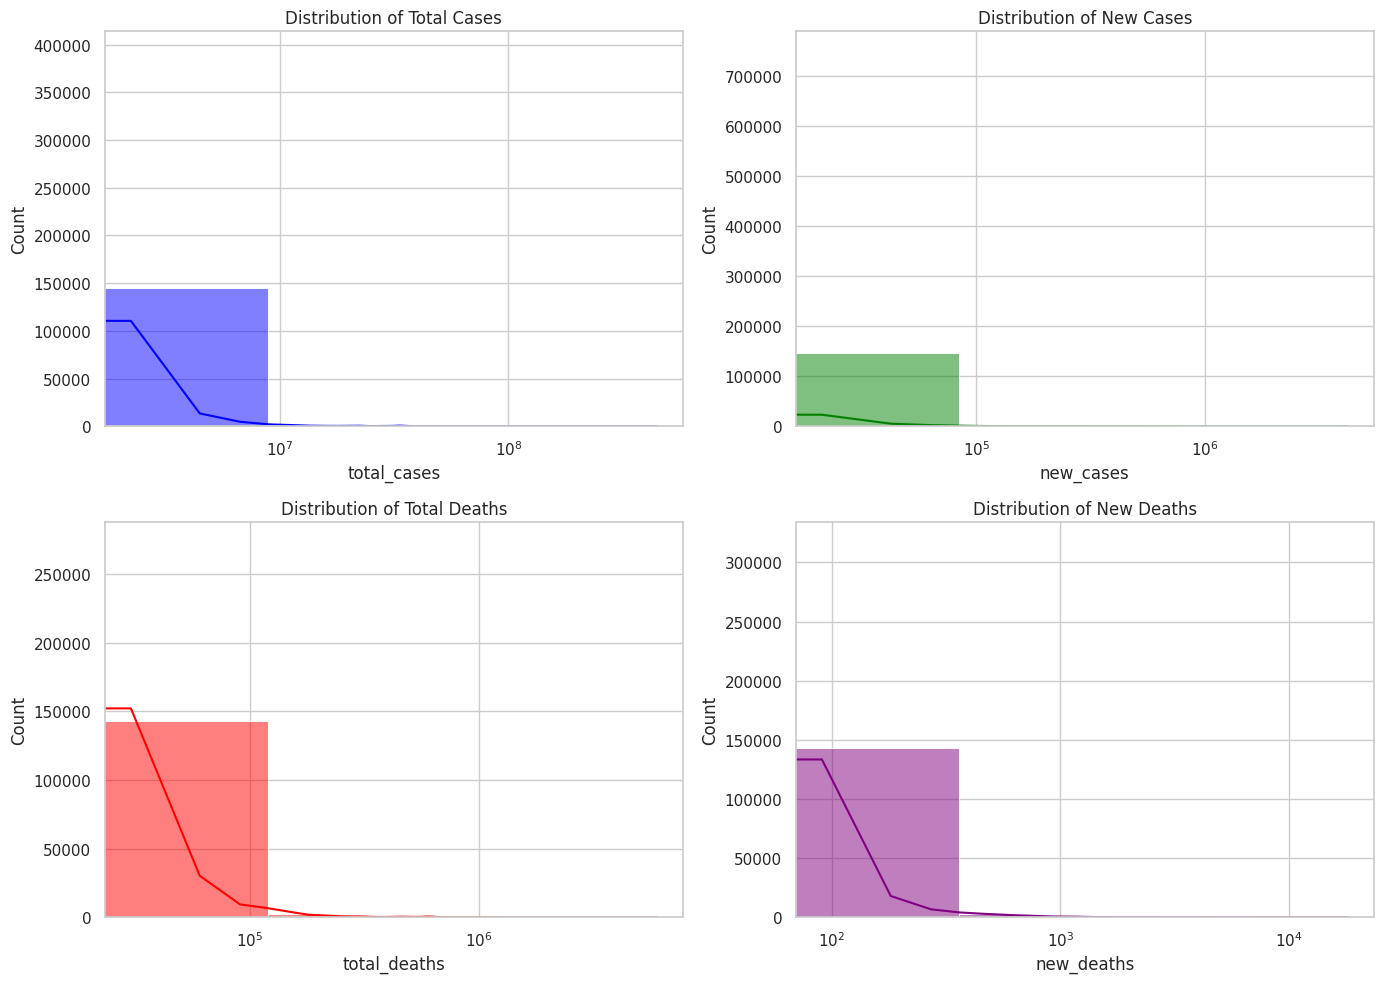

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with specified size
plt.figure(figsize=(14, 10))

# Define subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histograms for total_cases, new_cases, total_deaths, new_deaths
sns.histplot(data['total_cases'], ax=axes[0, 0], bins=50, kde=True, color='blue')
axes[0, 0].set_title('Distribution of Total Cases')
axes[0, 0].set_xscale('log')

sns.histplot(data['new_cases'], ax=axes[0, 1], bins=50, kde=True, color='green')
axes[0, 1].set_title('Distribution of New Cases')
axes[0, 1].set_xscale('log')

sns.histplot(data['total_deaths'], ax=axes[1, 0], bins=50, kde=True, color='red')
axes[1, 0].set_title('Distribution of Total Deaths')
axes[1, 0].set_xscale('log')

sns.histplot(data['new_deaths'], ax=axes[1, 1], bins=50, kde=True, color='purple')
axes[1, 1].set_title('Distribution of New Deaths')
axes[1, 1].set_xscale('log')

# Adjust layout
plt.tight_layout()
plt.show()

*Plot observations*

* **Total Cases and Total Deaths:** Both are heavily right-skewed, indicating that most countries have relatively fewer cases and deaths, with a few countries experiencing very high numbers.
* **New Cases and New Deaths:** These are also right-skewed, showing that on most days, the increase in cases and deaths is relatively small, with spikes on certain days.

**box plots for these variables to identify outliers**

<Figure size 1400x1000 with 0 Axes>

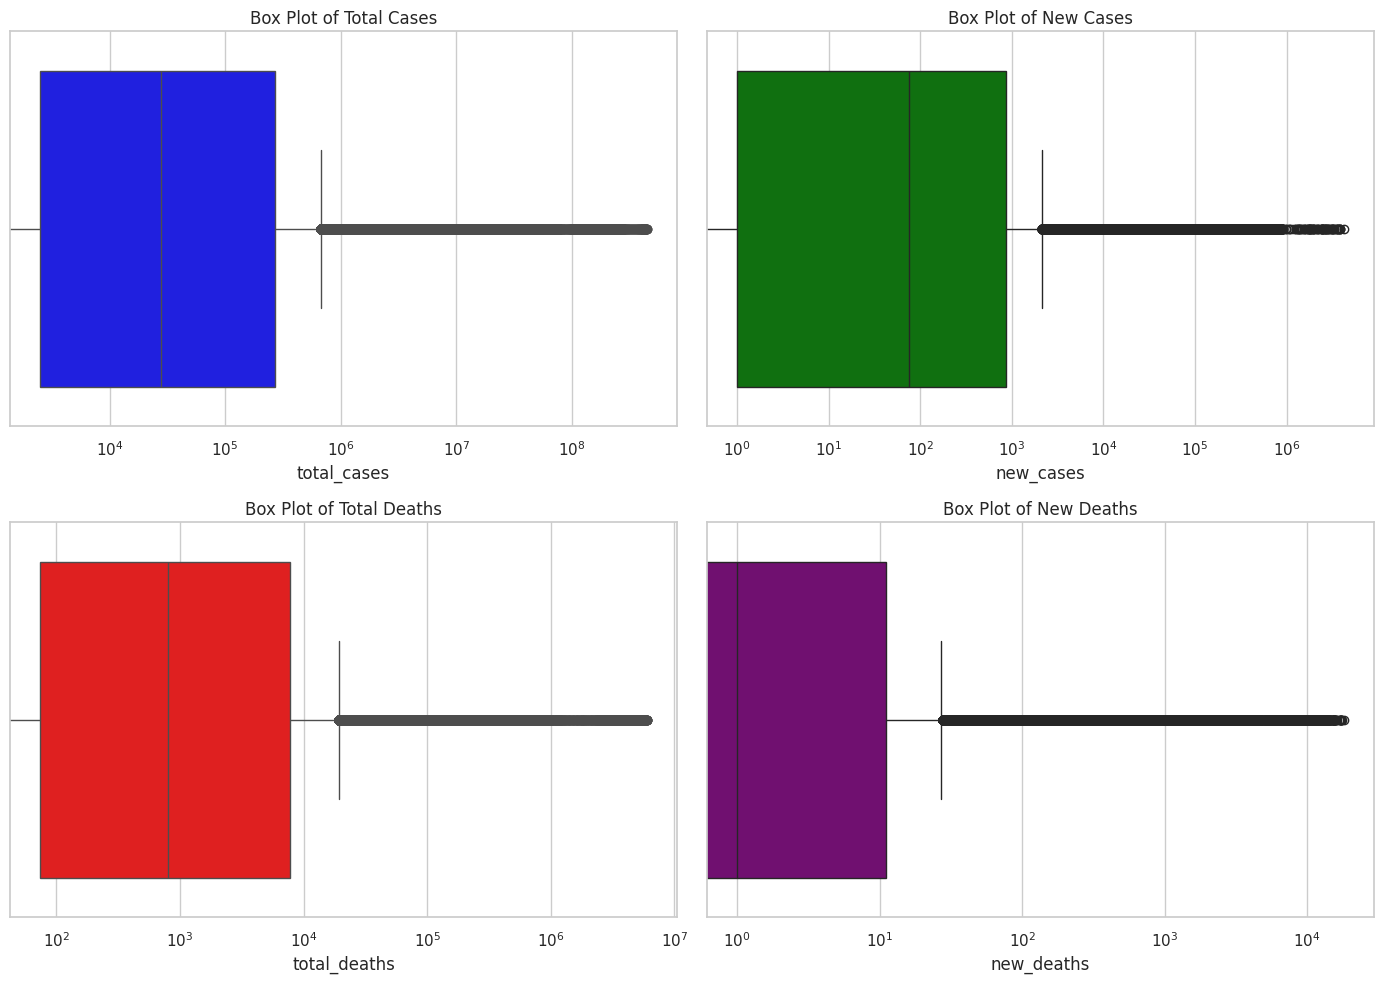

In [15]:
# Create a figure for box plots
plt.figure(figsize=(14, 10))

# Define subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Box plots for total_cases, new_cases, total_deaths, new_deaths
sns.boxplot(x=data['total_cases'], ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Box Plot of Total Cases')
axes[0, 0].set_xscale('log')

sns.boxplot(x=data['new_cases'], ax=axes[0, 1], color='green')
axes[0, 1].set_title('Box Plot of New Cases')
axes[0, 1].set_xscale('log')

sns.boxplot(x=data['total_deaths'], ax=axes[1, 0], color='red')
axes[1, 0].set_title('Box Plot of Total Deaths')
axes[1, 0].set_xscale('log')

sns.boxplot(x=data['new_deaths'], ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Box Plot of New Deaths')
axes[1, 1].set_xscale('log')

# Adjust layout
plt.tight_layout()
plt.show()

*    A concentration of data near the lower end for all variables, indicating most countries report fewer cases and deaths.
* The presence of significant outliers, especially for total cases and total deaths, where some countries have extremely high counts.

**Lets perform a correlation analysis to check how variables impact each other**

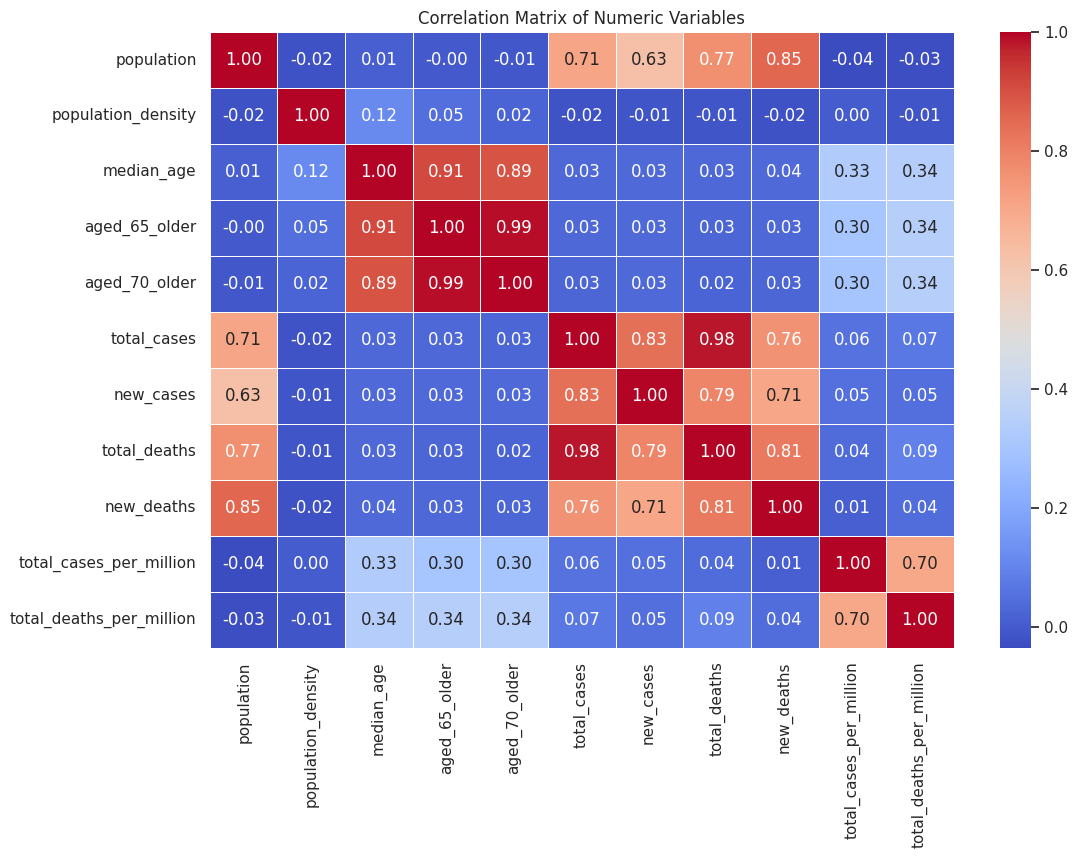

In [16]:
import numpy as np

# exclude non-numeric columns and re-calculate the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Plot the heatmap for the correlation matrix again
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


*    There is a strong correlation between variables related to case and death counts (total and new), which is consistent with what we would expect.
* Demographic factors (such as median age and age percentages of older populations) show moderate to strong correlations with one another, and a slight correlation with the COVID-19 metrics, potentially indicating that these factors may have an impact on COVID-19 outcomes.

**Time series analysis of rate of change in covid cases and deaths**

<Figure size 1400x700 with 0 Axes>

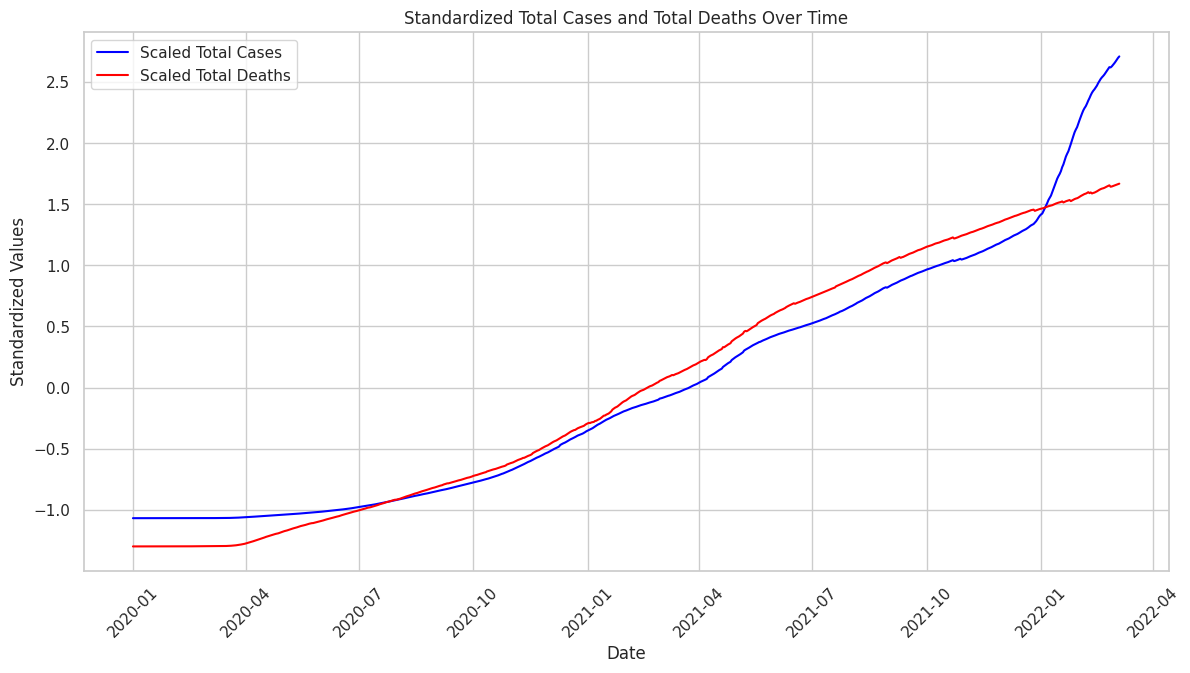

In [17]:
from sklearn.preprocessing import StandardScaler

# Parse the date column to datetime

data['date'] = pd.to_datetime(data['date'])

# Group the data by date and sum the totals

grouped_data = data.groupby('date').agg({'total_cases': 'sum', 'total_deaths': 'sum'}).reset_index()

# Plotting the time series trends for total cases and total deaths

plt.figure(figsize=(14, 7))

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the 'total_cases' and 'total_deaths' columns
scaled_data = scaler.fit_transform(grouped_data[['total_cases', 'total_deaths']])

# Create a DataFrame with the standardized values
scaled_df = pd.DataFrame(scaled_data, columns=['scaled_total_cases', 'scaled_total_deaths'])
scaled_df['date'] = grouped_data['date']

# Plotting the standardized time series data
plt.figure(figsize=(14, 7))

# Plot both scaled total cases and total deaths
plt.plot(scaled_df['date'], scaled_df['scaled_total_cases'], label='Scaled Total Cases', color='blue')
plt.plot(scaled_df['date'], scaled_df['scaled_total_deaths'], label='Scaled Total Deaths', color='red')

# Adding title and labels
plt.title('Standardized Total Cases and Total Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Standardized Values')
plt.legend()
plt.xticks(rotation=45)

plt.show()


* The standardized plot allows for a direct comparison of the rates of
change between total cases and total deaths over time, with both metrics now on a common scale. The z-scores indicate how many standard deviations each daily total is from the dataset mean for that metric.




# **Countries-table data**

* Entries and Columns: The dataset contains 234 entries and 19 columns.
* Data Types: There are float64, int64, and object data types present.
* Columns:
 * country, cca2, cca3 are categorical variables representing country names and codes.
 * rank, area, landAreaKm provide ranking and geographical information.
 * Various population-related columns for different years (pop1980, pop2000, pop2010, pop2022, pop2023, pop2030, pop2050).
 * Metrics like netChange, growthRate, worldPercentage, density, and densityMi.

In [18]:
# Load the dataset
countries_data_file_path = '/content/countries-table.csv'
countries = pd.read_csv(countries_data_file_path)

# Display the first few rows of the dataframe and basic info
countries_head = countries.head()
countries_info = countries.info()
countries_description = countries.describe()

countries_head, countries_info, countries_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          234 non-null    object 
 1   rank             234 non-null    int64  
 2   area             234 non-null    float64
 3   landAreaKm       234 non-null    float64
 4   cca2             233 non-null    object 
 5   cca3             234 non-null    object 
 6   netChange        226 non-null    float64
 7   growthRate       234 non-null    float64
 8   worldPercentage  228 non-null    float64
 9   density          234 non-null    float64
 10  densityMi        234 non-null    float64
 11  place            234 non-null    int64  
 12  pop1980          234 non-null    int64  
 13  pop2000          234 non-null    int64  
 14  pop2010          234 non-null    int64  
 15  pop2022          234 non-null    int64  
 16  pop2023          234 non-null    int64  
 17  pop2030         

(         country  rank       area  landAreaKm cca2 cca3  netChange  \
 0          India     1  3287590.0   2973190.0   IN  IND     0.4184   
 1          China     2  9706961.0   9424702.9   CN  CHN    -0.0113   
 2  United States     3  9372610.0   9147420.0   US  USA     0.0581   
 3      Indonesia     4  1904569.0   1877519.0   ID  IDN     0.0727   
 4       Pakistan     5   881912.0    770880.0   PK  PAK     0.1495   
 
    growthRate  worldPercentage   density  densityMi  place    pop1980  \
 0      0.0081           0.1785  480.5033  1244.5036    356  696828385   
 1     -0.0002           0.1781  151.2696   391.7884    156  982372466   
 2      0.0050           0.0425   37.1686    96.2666    840  223140018   
 3      0.0074           0.0347  147.8196   382.8528    360  148177096   
 4      0.0198           0.0300  311.9625   807.9829    586   80624057   
 
       pop2000     pop2010     pop2022     pop2023     pop2030     pop2050  
 0  1059633675  1240613620  1417173173  142862766

In [19]:
#check for null values further
print(countries.isnull().mean() * 100)

country            0.000000
rank               0.000000
area               0.000000
landAreaKm         0.000000
cca2               0.427350
cca3               0.000000
netChange          3.418803
growthRate         0.000000
worldPercentage    2.564103
density            0.000000
densityMi          0.000000
place              0.000000
pop1980            0.000000
pop2000            0.000000
pop2010            0.000000
pop2022            0.000000
pop2023            0.000000
pop2030            0.000000
pop2050            0.000000
dtype: float64


In [20]:
# when 'cca2' is missing, we can potentially fill it using 'cca3'
# For 'netChange' and 'worldPercentage', we can fill with mean or median.

countries['cca2'] = countries.apply(
    lambda row: row['cca3'][:2] if pd.isnull(row['cca2']) else row['cca2'], axis=1
)

# Apply the strategy for 'netChange' and 'worldPercentage' by filling missing values with the mean
countries['netChange'].fillna(countries['netChange'].mean(), inplace=True)
countries['worldPercentage'].fillna(countries['worldPercentage'].mean(), inplace=True)

# Re-check for missing values to confirm they have been dealt with
new_missing_values = countries.isnull().sum()

new_missing_values, countries.head()


(country            0
 rank               0
 area               0
 landAreaKm         0
 cca2               0
 cca3               0
 netChange          0
 growthRate         0
 worldPercentage    0
 density            0
 densityMi          0
 place              0
 pop1980            0
 pop2000            0
 pop2010            0
 pop2022            0
 pop2023            0
 pop2030            0
 pop2050            0
 dtype: int64,
          country  rank       area  landAreaKm cca2 cca3  netChange  \
 0          India     1  3287590.0   2973190.0   IN  IND     0.4184   
 1          China     2  9706961.0   9424702.9   CN  CHN    -0.0113   
 2  United States     3  9372610.0   9147420.0   US  USA     0.0581   
 3      Indonesia     4  1904569.0   1877519.0   ID  IDN     0.0727   
 4       Pakistan     5   881912.0    770880.0   PK  PAK     0.1495   
 
    growthRate  worldPercentage   density  densityMi  place    pop1980  \
 0      0.0081           0.1785  480.5033  1244.5036    356  6968

In [21]:
# Everything is looking good, now Save the cleaned data to a new CSV file
output_file_path = 'cleaned_countries_table.csv'
countries.to_csv(output_file_path, index=False)
print("Data cleaning complete. Cleaned data saved to:", output_file_path)

Data cleaning complete. Cleaned data saved to: cleaned_countries_table.csv


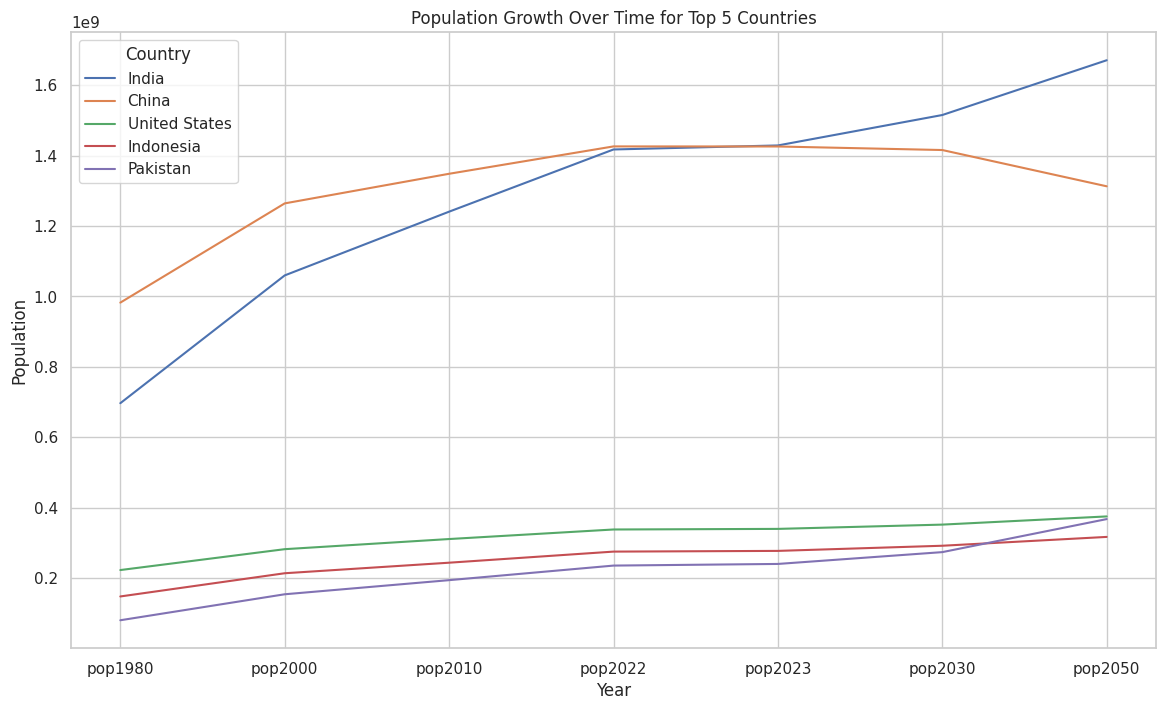

In [22]:
import matplotlib.pyplot as plt

# Filter data for the top 5 most populous countries as of 2023
top_countries = countries.nlargest(5, 'pop2023')['country']

# Extracting population data for these countries from 1980 to 2050
population_data = countries[countries['country'].isin(top_countries)][['country', 'pop1980', 'pop2000', 'pop2010', 'pop2022', 'pop2023', 'pop2030', 'pop2050']]

# Setting the index to country for easier plotting
population_data.set_index('country', inplace=True)

# Plotting the population growth over time
fig, ax = plt.subplots(figsize=(14, 8))
population_data.T.plot(ax=ax)
plt.title('Population Growth Over Time for Top 5 Countries')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.legend(title='Country')
plt.show()


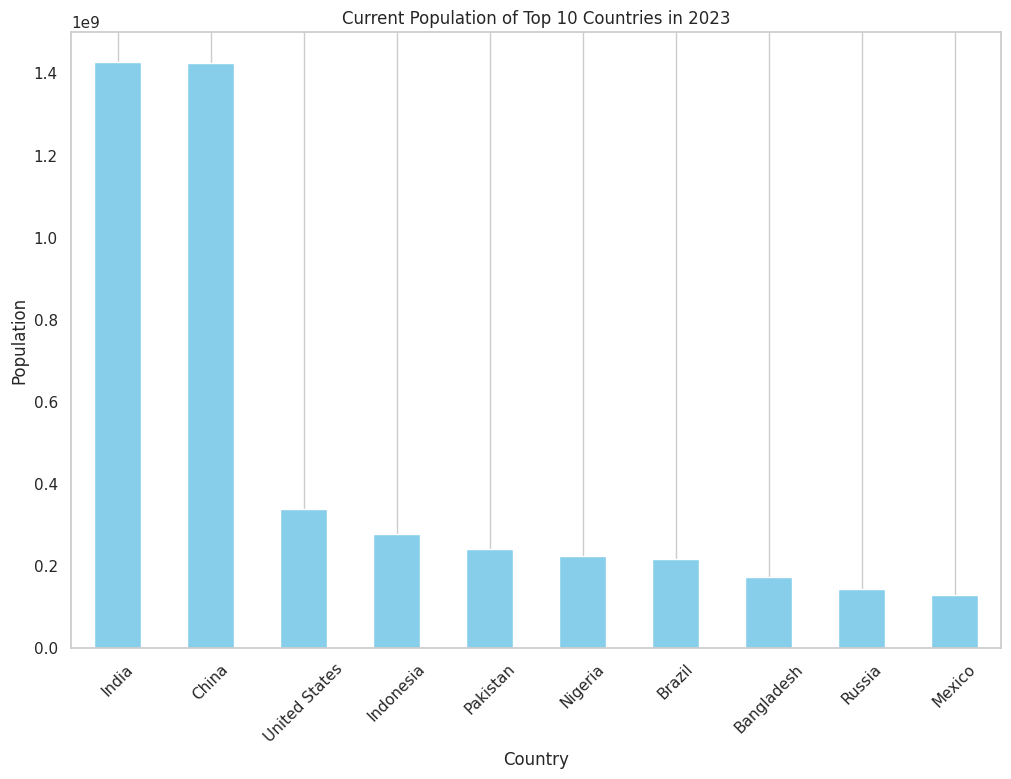

In [23]:
# Filter data for the top 10 most populous countries as of 2023
top_10_countries = countries.nlargest(10, 'pop2023')[['country', 'pop2023']]

# Plotting the current population of the top 10 countries
fig, ax = plt.subplots(figsize=(12, 8))
top_10_countries.set_index('country')['pop2023'].plot(kind='bar', ax=ax, color='skyblue')
plt.title('Current Population of Top 10 Countries in 2023')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# **Merging both datasets for further analysis**

In [24]:
# First, let's ensure the 'iso_code' in the COVID-19 dataset is of string type
data['iso_code'] = data['iso_code'].astype(str)

# Also ensure that 'cca3' in the new dataset is of string type
countries['cca3'] = countries['cca3'].astype(str)

# Now, let's perform the merge operation using 'iso_code' and 'cca3' as keys
merged_data = pd.merge(left=data, right=countries, left_on='iso_code', right_on='cca3', how='inner')

# Let's check the first few rows of the merged data to confirm it merged correctly
merged_data_head = merged_data.head()
merged_data_info = merged_data.info()

merged_data_head, merged_data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146432 entries, 0 to 146431
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   iso_code                  146432 non-null  object        
 1   location                  146432 non-null  object        
 2   date                      146432 non-null  datetime64[ns]
 3   population                146432 non-null  int64         
 4   population_density        146432 non-null  float64       
 5   median_age                146432 non-null  float64       
 6   aged_65_older             146432 non-null  float64       
 7   aged_70_older             146432 non-null  float64       
 8   total_cases               146432 non-null  int64         
 9   new_cases                 146432 non-null  int64         
 10  total_deaths              146432 non-null  int64         
 11  new_deaths                146432 non-null  int64         
 12  to

(  iso_code     location       date  population  population_density  \
 0      AFG  Afghanistan 2020-02-24    39835428              54.422   
 1      AFG  Afghanistan 2020-02-25    39835428              54.422   
 2      AFG  Afghanistan 2020-02-26    39835428              54.422   
 3      AFG  Afghanistan 2020-02-27    39835428              54.422   
 4      AFG  Afghanistan 2020-02-28    39835428              54.422   
 
    median_age  aged_65_older  aged_70_older  total_cases  new_cases  ...  \
 0        18.6          2.581          1.337            5          5  ...   
 1        18.6          2.581          1.337            5          0  ...   
 2        18.6          2.581          1.337            5          0  ...   
 3        18.6          2.581          1.337            5          0  ...   
 4        18.6          2.581          1.337            5          0  ...   
 
    density  densityMi  place   pop1980   pop2000   pop2010   pop2022  \
 0  64.7622   167.7341      4  1248

In [25]:
#check for null values in merged data
print(merged_data.isnull().mean() * 100)

iso_code                    0.0
location                    0.0
date                        0.0
population                  0.0
population_density          0.0
median_age                  0.0
aged_65_older               0.0
aged_70_older               0.0
total_cases                 0.0
new_cases                   0.0
total_deaths                0.0
new_deaths                  0.0
total_cases_per_million     0.0
total_deaths_per_million    0.0
country                     0.0
rank                        0.0
area                        0.0
landAreaKm                  0.0
cca2                        0.0
cca3                        0.0
netChange                   0.0
growthRate                  0.0
worldPercentage             0.0
density                     0.0
densityMi                   0.0
place                       0.0
pop1980                     0.0
pop2000                     0.0
pop2010                     0.0
pop2022                     0.0
pop2023                     0.0
pop2030 

In [26]:
# Everything is looking good, now Save the merged data to a new CSV file
output_file_path = 'merged_data.csv'
merged_data.to_csv(output_file_path, index=False)
print("Data cleaning complete. Cleaned data saved to:", output_file_path)

Data cleaning complete. Cleaned data saved to: merged_data.csv


# **Building a Dashboard**

In [27]:
!pip install jupyter-dash
!pip install dash-bootstrap-components

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 4.7 MB/s eta 0:00:00


In [29]:
# Filter data for India and check the 'total_cases_per_million' column
india_data = merged_data[merged_data['location'] == 'India']
india_deaths_per_million = india_data[['date', 'total_deaths_per_million']]

# Check for any anomalies or missing values
anomalies = india_data[india_data['total_deaths_per_million'] <= 0]

# Show a summary
india_cases_summary = {
    'Head of India Data': india_data.head(),
    'Cases per Million Stats': india_deaths_per_million.describe(),
    'Anomalies or Incorrect Data': anomalies
}

india_cases_summary


{'Head of India Data':       iso_code location       date  population  population_density  \
 63030      IND    India 2020-01-30  1393409033             450.419   
 63031      IND    India 2020-01-31  1393409033             450.419   
 63032      IND    India 2020-02-01  1393409033             450.419   
 63033      IND    India 2020-02-02  1393409033             450.419   
 63034      IND    India 2020-02-03  1393409033             450.419   
 
        median_age  aged_65_older  aged_70_older  total_cases  new_cases  ...  \
 63030        28.2          5.989          3.414            1          1  ...   
 63031        28.2          5.989          3.414            1          0  ...   
 63032        28.2          5.989          3.414            1          0  ...   
 63033        28.2          5.989          3.414            2          1  ...   
 63034        28.2          5.989          3.414            3          1  ...   
 
         density  densityMi  place    pop1980     pop2000     

In [30]:
# Import necessary libraries
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import pandas as pd

# Load and prepare the data
data = pd.read_csv('merged_data.csv')  # Update the path to your dataset
data['date'] = pd.to_datetime(data['date'])  # Convert 'date' to datetime format for better handling

# Initialize the Dash app with suppress_callback_exceptions=True
app = Dash(__name__, suppress_callback_exceptions=True)

# Define the app layout
app.layout = html.Div([
    html.H1("COVID-19 Impact on Global Population Dynamics"),
    dcc.Tabs(id='tabs', value='tab-map', children=[
        dcc.Tab(label='Map View', value='tab-map'),
        dcc.Tab(label='Trend Analysis', value='tab-trend'),
        dcc.Tab(label='Comparative Analysis', value='tab-comp'),
        dcc.Tab(label='Correlation Heatmap', value='tab-corr'),
    ]),
    html.Div(id='tabs-content')
])

@app.callback(Output('tabs-content', 'children'),
              Input('tabs', 'value'))
def render_content(tab):
    if tab == 'tab-map':
        return html.Div([
            dcc.Graph(id='choropleth-map')
        ])
    elif tab == 'tab-trend':
        return html.Div([
            html.Label([
                "Select a Country",
                dcc.Dropdown(
                    id='country-dropdown-trend',
                    options=[{'label': i, 'value': i} for i in sorted(data['location'].unique())],
                    value='World',
                    clearable=False,
                ),
            ]),
            dcc.Graph(id='line-chart-trend')
        ])
    elif tab == 'tab-comp':
        return html.Div([
            html.Label([
                "Compare Countries",
                dcc.Dropdown(
                    id='countries-dropdown-comp',
                    options=[{'label': i, 'value': i} for i in sorted(data['location'].unique())],
                    value=['United States', 'India'],
                    multi=True,
                ),
            ]),
            dcc.Graph(id='comparison-chart')
        ])
    elif tab == 'tab-corr':
        return html.Div([
            dcc.Graph(id='correlation-heatmap')
        ])

# Callback for the Choropleth map
@app.callback(
    Output('choropleth-map', 'figure'),
    [Input('tabs', 'value')]
)
def update_choropleth_map(tab):
    if tab == 'tab-map':
        # We need to get the most recent data for each country
        latest_data = data.groupby('location').max().reset_index()

        fig = px.choropleth(latest_data, locations='iso_code',
                            color='total_deaths_per_million',
                            hover_name='location',
                            color_continuous_scale='Reds',
                            title='Total COVID-19 Deaths per Million')
        fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
        return fig
    return {}

# Callback for the line chart trend
@app.callback(
    Output('line-chart-trend', 'figure'),
    [Input('country-dropdown-trend', 'value')]
)
def update_line_chart(selected_country):
    filtered_data = data[data['location'] == selected_country]
    fig = px.line(filtered_data, x='date', y=['total_cases', 'total_deaths'],
                  title=f'Total Cases and Deaths Over Time in {selected_country}')
    return fig

# Callback for the comparative analysis chart
@app.callback(
    Output('comparison-chart', 'figure'),
    [Input('countries-dropdown-comp', 'value')]
)
def update_comparison_chart(selected_countries):
    # Filter the data for the selected countries and the years 2022 and 2023
    filtered_data = data[(data['location'].isin(selected_countries)) & (data['date'].dt.year.isin([2022, 2023]))]

    # Group by location to aggregate total cases for 2022 and 2023
    total_cases = filtered_data.groupby('location')['total_cases'].sum().reset_index()

    # Get the latest population density for each country
    latest_population_density = data[data['date'].dt.year.isin([2022, 2023])].groupby('location').agg({'population_density': 'mean'}).reset_index()

    # Merge the total cases with the latest population density
    comparison_data = pd.merge(total_cases, latest_population_density, on='location')

    # Create the scatter plot
    fig = px.scatter(comparison_data, x='population_density', y='total_cases',
                     size='total_cases', color='location', hover_name='location',
                     title='Total Cases for 2022 and 2023 vs Population Density',
                     labels={'total_cases': 'Total Cases (2022 & 2023)', 'population_density': 'Population Density'},
                     size_max=60)

    # Improve the aesthetics
    fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')),
                      selector=dict(mode='markers'))
    fig.update_layout(transition_duration=500,
                      plot_bgcolor="white",
                      xaxis=dict(title='Population Density', gridcolor='lightgrey'),
                      yaxis=dict(title='Total Cases (2022 & 2023)', gridcolor='lightgrey'))

    return fig

# Callback for the correlation heatmap
@app.callback(
    Output('correlation-heatmap', 'figure'),
    [Input('tabs', 'value')]
)
def update_correlation_heatmap(tab):
    if tab == 'tab-corr':
        # Selecting relevant columns for correlation
        correlation_data = data[['total_cases_per_million', 'total_deaths_per_million',
                                 'population_density', 'median_age', 'aged_65_older', 'aged_70_older']]
        corr_matrix = correlation_data.corr()

        fig = px.imshow(corr_matrix, text_auto=True, aspect='auto',
                        color_continuous_scale='Blues', title='Correlation Heatmap')
        return fig
    return {}

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>